In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [140]:
Training_set = pd.read_csv("heart_disease_3features.csv")

In [141]:
Training_set.head()

,age,trestbps,thalach,heart_disease
0,63.0,145.0,150.0,0
1,67.0,160.0,108.0,1
2,67.0,120.0,129.0,1
3,37.0,130.0,187.0,0
4,41.0,130.0,172.0,0


In [142]:
ts_age = np.array(Training_set["age"])
mean = np.mean(ts_age)
std = np.std(ts_age)
ts_age = ts_age - mean
ts_age = ts_age / std
ts_age

array([ 0.94872647,  1.39200191,  1.39200191, -1.93256387, -1.48928843,
        0.17299446,  0.83790761,  0.28381332,  0.94872647, -0.15946212,
        0.28381332,  0.17299446,  0.17299446, -1.15683185, -0.27028098,
        0.28381332, -0.71355642, -0.04864326, -0.71355642, -0.60273756,
        1.05954533,  0.39463218,  0.39463218,  0.39463218,  0.61626989,
       -0.4919187 ,  0.39463218,  1.28118305, -1.26765071, -1.60010729,
        1.61363963,  0.61626989,  1.05954533,  0.50545103, -1.15683185,
       -1.37846957, -1.26765071,  0.28381332,  0.0621756 ,  0.72708875,
        1.17036419, -1.60010729,  1.83527735,  0.50545103,  0.72708875,
        0.39463218, -0.38109984, -0.4919187 ,  1.17036419, -0.15946212,
       -1.48928843,  1.17036419, -1.15683185, -1.15683185,  0.61626989,
       -0.04864326, -0.4919187 , -1.48928843, -0.04864326, -0.38109984,
       -0.38109984, -0.93519414,  0.39463218, -0.04864326, -0.04864326,
        0.61626989,  0.61626989, -0.04864326,  0.50545103, -0.93

In [143]:
ts_trestbps = np.array(Training_set["trestbps"])
mean = np.mean(ts_trestbps)
std = np.std(ts_trestbps)
ts_trestbps = ts_trestbps - mean
ts_trestbps = ts_trestbps / std
ts_trestbps

array([ 0.75752504,  1.61121989, -0.6652997 , -0.0961698 , -0.0961698 ,
       -0.6652997 ,  0.47296009, -0.6652997 , -0.0961698 ,  0.47296009,
        0.47296009,  0.47296009, -0.0961698 , -0.6652997 ,  2.29417576,
        1.04208999, -1.2344296 ,  0.47296009, -0.0961698 , -0.0961698 ,
       -1.2344296 ,  1.04208999, -0.6652997 ,  0.01765618, -0.0961698 ,
       -0.6652997 , -0.6652997 ,  1.04208999,  1.04208999, -1.2344296 ,
        0.47296009, -0.83603867,  0.47296009,  0.18839514, -0.0961698 ,
        0.47296009, -0.6652997 ,  1.04208999,  0.01765618,  1.04208999,
        1.04208999,  0.47296009,  1.61121989,  1.04208999, -0.0961698 ,
       -1.12060362, -1.2344296 ,  1.04208999,  0.47296009, -0.0961698 ,
       -1.51899455, -0.6652997 , -1.12060362, -0.0961698 , -0.0961698 ,
       -0.43764774,  0.47296009, -1.2344296 , -0.38073475, -0.38073475,
       -0.0961698 ,  0.58678607, -0.20999578,  0.18839514, -0.6652997 ,
        0.75752504,  0.47296009,  1.04208999,  2.18034978,  1.04

In [144]:
ts_thalach = np.array(Training_set["thalach"])
mean = np.mean(ts_thalach)
std = np.std(ts_thalach)
ts_thalach = ts_thalach - mean
ts_thalach = ts_thalach / std
ts_thalach

array([ 0.01719733, -1.82190531, -0.90235399,  1.63735918,  0.98053681,
        1.24326576,  0.45507891,  0.58644339, -0.11416714,  0.23613812,
       -0.07037899,  0.1485618 , -0.33310794,  1.02432497,  0.54265523,
        1.06811312,  0.80538418,  0.45507891, -0.46447241,  0.93674865,
       -0.24553162,  0.54265523,  0.45507891,  1.02432497, -0.77098952,
        0.36750259,  0.98053681, -1.55917636,  0.93674865, -1.55917636,
        0.06098549,  0.45507891,  0.36750259,  0.49886707,  1.28705392,
        1.24326576, -1.29644741, -1.64675268, -0.77098952, -0.55204873,
       -1.55917636,  1.24326576,  0.54265523,  0.32371444,  0.84917233,
        0.6740197 , -1.16508294, -0.94614215,  0.32371444,  0.10477365,
        0.80538418, -0.42068425,  0.1485618 ,  1.68114734, -0.24553162,
       -1.77811715,  0.58644339,  0.36750259,  0.10477365, -1.07750662,
       -0.33310794,  0.45507891, -0.81477768,  0.89296049, -1.60296452,
       -0.33310794,  0.23613812,  0.6740197 , -0.42068425, -0.11

In [145]:
ts_target = np.array(Training_set["heart_disease"])

In [146]:
def cost_calc(w1,w2,w3,b):
    cost = 0
    m = len(ts_age)
    for i in range(len(ts_age)):
        y = ts_target[i]
        y_hat = w1*ts_age[i] + ts_trestbps[i]*w2 + ts_thalach[i]*w3 + b
        y_hat = 1 / (1 + math.exp(-y_hat))
        current_cost = (-y* math.log(y_hat)) - ((1-y)* math.log(1-y_hat))
        cost += current_cost
    return cost/m

In [147]:
cost_calc(1,2,3,4)

np.float64(2.8735745864031763)

In [148]:
def gradient_comp(w1,w2,w3,b):
    m = len(ts_age)
    dw1 = 0
    dw2 = 0
    dw3 = 0
    db = 0
    for i in range(m):
        y_hat = w1*ts_age[i] + ts_trestbps[i]*w2 + ts_thalach[i]*w3 + b
        y_hat = 1 / (1 + math.exp(-y_hat))
        y = ts_target[i]
        dw1 += ((y_hat - y)*ts_age[i])/m
        dw2 += ((y_hat - y)*ts_trestbps[i])/m
        dw3 += ((y_hat - y)*ts_thalach[i])/m
        db += (y_hat  - y)/m
    return dw1,dw2,dw3,db

In [149]:
def gradient_descent(epochs=10000,learning_rate=0.01):
    w1=0
    w2=0
    w3=0
    b =0
    cost_history = []
    m = len(ts_age)
    for i in range (epochs):
        dw1,dw2,dw3,db = gradient_comp(w1,w2,w3,b)
        w1 = w1 - learning_rate*dw1
        w2 = w2 - learning_rate*dw2
        w3 = w3 - learning_rate*dw3
        b  = b  - learning_rate*db
        if i%10==0:
            cost = cost_calc(w1,w2,w3,b)
            print(cost)
            cost_history.append(cost)
    x_points = np.linspace(1,epochs//10,epochs//10)
    sns.lineplot(x = x_points, y = cost_history, color = "red", label = "Error after every 10 steps") 
    plt.xlabel("iterations")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

    return w1,w2,w3,b

0.6925190510599668


0.6864718438989212
0.6808291072638976
0.6755620651759637
0.6706437654742552
0.6660490367983625
0.661754428827325
0.6577381403026852
0.6539799386909207
0.650461074692044
0.6471641942011623
0.6440732497927575
0.641173413329477
0.6384509908987206
0.6358933409478946
0.6334887962169705
0.6312265898482008
0.6290967858801195
0.6270902141992271
0.625198409921587
0.6234135571018373
0.6217284366139202
0.6201363780116468
0.6186312151543701
0.6172072453705518
0.6158591919272896
0.6145821695750341
0.6133716529420589
0.6122234475615491
0.6111336633245068
0.610098690163127
0.609115175781491
0.6081800052628077
0.6072902823946819
0.6064433125658791
0.6056365870995363
0.6048677688986704
0.6041346792901214
0.603435285962675
0.6027676919040428
0.6021301252496554
0.6015209299638533
0.6009385572810754
0.6003815578410624
0.5998485744580198
0.5993383354689966
0.5988496486117082
0.5983813953864362
0.5979325258607673
0.5975020538795665
0.5970890526459907
0.5966926506423856
0.5963120278626745
0.5959464123303733


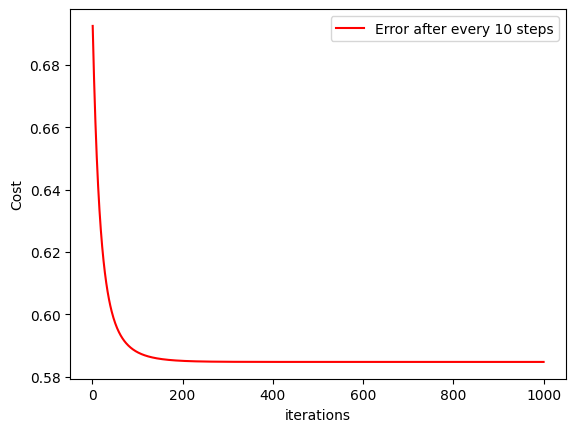

0.08100146466139754 0.2971461411874823 -0.9661803378829721 -0.17611519039188692


In [150]:
ow1,ow2,ow3,ob = gradient_descent()
print(ow1,ow2,ow3,ob)

In [ ]:
def predict_heart_disease(age, trestbps, thalach):
    """
    Predict heart disease probability using trained logistic regression model
    """
    # Use the original normalization parameters (before normalization)
    # We need to calculate these from the original data
    age_original_mean = np.mean(np.array(Training_set["age"]))
    age_original_std = np.std(np.array(Training_set["age"]))
    trestbps_original_mean = np.mean(np.array(Training_set["trestbps"]))
    trestbps_original_std = np.std(np.array(Training_set["trestbps"]))
    thalach_original_mean = np.mean(np.array(Training_set["thalach"]))
    thalach_original_std = np.std(np.array(Training_set["thalach"]))
    
    # Normalize inputs using original parameters
    age_norm = (age - age_original_mean) / age_original_std
    trestbps_norm = (trestbps - trestbps_original_mean) / trestbps_original_std
    thalach_norm = (thalach - thalach_original_mean) / thalach_original_std
    
    # Calculate probability using trained model weights
    z = ow1*age_norm + ow2*trestbps_norm + ow3*thalach_norm + ob
    probability = 1 / (1 + math.exp(-z))
    
    # Format output nicely
    percentage = probability * 100
    
    print(f"🔍 INPUT: Age={age}, Blood Pressure={trestbps}, Max Heart Rate={thalach}")
    print(f"📊 Heart Disease Probability: {percentage:.2f}%")
    
    if probability > 0.5:
        print("🚨 PREDICTION: HIGH RISK - Heart disease is likely")
    else:
        print("✅ PREDICTION: LOW RISK - Heart disease is unlikely")
    
    return probability

In [ ]:
# Test the improved prediction function
predict_heart_disease(50, 120, 160)  # Example: 50 year old, BP=120, Max HR=160

There is a high chance 5.241922525339345e-54 you dont have a heart disease
